In [96]:
import pandas as  pd
import yfinance as yf

In [97]:
#df_train_all    = pd.read_csv('data/SPX.csv')

start_date = "2021-01-03"
end_date   = "2024-11-01"

data = yf.download("^NSEI", start=start_date, end=end_date)
data.columns = data.columns.get_level_values(0) # from multi index to single index

data = data.reset_index()

print(data.head())




[*********************100%***********************]  1 of 1 completed

Price                      Date     Adj Close         Close          High  \
0     2021-01-04 00:00:00+00:00  14132.900391  14132.900391  14147.950195   
1     2021-01-05 00:00:00+00:00  14199.500000  14199.500000  14215.599609   
2     2021-01-06 00:00:00+00:00  14146.250000  14146.250000  14244.150391   
3     2021-01-07 00:00:00+00:00  14137.349609  14137.349609  14256.250000   
4     2021-01-08 00:00:00+00:00  14347.250000  14347.250000  14367.299805   

Price           Low          Open  Volume  
0      13953.750000  14104.349609  495000  
1      14048.150391  14075.150391  492500  
2      14039.900391  14240.950195  632300  
3      14123.099609  14253.750000  559200  
4      14221.650391  14258.400391  613500  


In [98]:


df= data.copy()

Data preprocessing

In [99]:
print(df.isnull().sum())

# Optionally, fill missing values with forward filling or drop them
df.fillna(method='ffill', inplace=True)

Price
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


C:\Users\sadha\AppData\Local\Temp\ipykernel_48616\3642176079.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [100]:
df.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [101]:


# Set 'Date' as the index
#df.set_index('Date ', inplace=True)

# Show the cleaned data
df.head()
data = df.copy()

In [102]:
data.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2021-01-04 00:00:00+00:00,14132.900391,14132.900391,14147.950195,13953.750000,14104.349609,495000
1,2021-01-05 00:00:00+00:00,14199.500000,14199.500000,14215.599609,14048.150391,14075.150391,492500
2,2021-01-06 00:00:00+00:00,14146.250000,14146.250000,14244.150391,14039.900391,14240.950195,632300
3,2021-01-07 00:00:00+00:00,14137.349609,14137.349609,14256.250000,14123.099609,14253.750000,559200
4,2021-01-08 00:00:00+00:00,14347.250000,14347.250000,14367.299805,14221.650391,14258.400391,613500


In [103]:
data.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume
941,2024-10-25 00:00:00+00:00,24180.800781,24180.800781,24440.250000,24073.900391,24418.050781,372600
942,2024-10-28 00:00:00+00:00,24339.150391,24339.150391,24492.599609,24134.900391,24251.099609,278600
943,2024-10-29 00:00:00+00:00,24466.849609,24466.849609,24484.500000,24140.849609,24328.849609,332000
944,2024-10-30 00:00:00+00:00,24340.849609,24340.849609,24498.199219,24307.300781,24371.449219,285200
945,2024-10-31 00:00:00+00:00,24205.349609,24205.349609,24372.449219,24172.599609,24349.849609,287000


In [104]:
data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [105]:
data_copy= data.copy()

In [106]:
data_copy.shape

(946, 7)

In [107]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Drop the 'Date' column as it's not numeric
data = data.drop('Date', axis=1)

# Convert to a NumPy array
data_values = data.values  # Includes all numeric columns

# Normalize the entire dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_values)

# Create sequences for all columns
def create_sequences_all_columns(data, sequence_length=8):
    sequences = []
    labels = []
    for i in range(sequence_length, len(data)):
        sequences.append(data[i-sequence_length:i, :])  # All columns as input
        labels.append(data[i, 3])  # The 'Close' column as the target (index 3)
    return np.array(sequences), np.array(labels)

# Generate sequences
sequence_length = 8  # Last 60 rows as input
X, y = create_sequences_all_columns(scaled_data, sequence_length)


X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

print(f"X shape: {X.shape}")
train_size = int(len(X) * 0.88)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes for verification
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X shape: (938, 8, 6)
X_train shape: (825, 8, 6), y_train shape: (825,)
X_test shape: (113, 8, 6), y_test shape: (113,)


In [108]:
 import tensorflow as tf

# # Build the TCNN model with dilated convolutions
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 6), dilation_rate=1),  # No dilation for first layer
#     tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', dilation_rate=4),  # Dilated convolution in second layer
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1)  # Output layer for regression (next day's price)
# ])

# # Compile the model
# #model.compile(optimizer='adam', loss='mean_squared_error', )
# model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])
# # Print model summary
# model.summary()

In [109]:
class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(SelfAttention, self).__init__()
        self.query_dense = tf.keras.layers.Dense(units)
        self.key_dense = tf.keras.layers.Dense(units)
        self.value_dense = tf.keras.layers.Dense(units)
        self.softmax = tf.keras.layers.Softmax(axis=-1)

    def call(self, inputs):
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        attention_weights = self.softmax(tf.matmul(query, key, transpose_b=True) / tf.sqrt(tf.cast(tf.shape(key)[-1], tf.float32)))
        return tf.matmul(attention_weights, value)

model = tf.keras.Sequential([
    # Initial convolution layers
    tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 6), dilation_rate=1, padding='causal'),
    tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', dilation_rate=2, padding='causal'),
    tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu', dilation_rate=4, padding='causal'),
    
    # Self-Attention layer
    SelfAttention(units=128),
    
    # Global pooling and dense layers
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    # Output layer
    tf.keras.layers.Dense(1)
])



c:\Sadhana\458\Module_7\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
#model.compile(optimizer='adam', loss='mean_squared_error', )
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])
# Print model summary
model.summary()

model.save('model.h5')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 8, 128)         │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 8, 64)          │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 8, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ self_attention_5                │ (None, 8, 128)         │        49,536 │
│ (SelfAttention)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,465 (353.38 KB)

 Trainable params: 90,465 (353.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0945 - mae: 0.2589 - mse: 0.0945 - val_loss: 0.0065 - val_mae: 0.0742 - val_mse: 0.0065
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0172 - mae: 0.1034 - mse: 0.0172 - val_loss: 0.0016 - val_mae: 0.0340 - val_mse: 0.0016
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mae: 0.0752 - mse: 0.0097 - val_loss: 0.0028 - val_mae: 0.0457 - val_mse: 0.0028
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mae: 0.0596 - mse: 0.0063 - val_loss: 0.0015 - val_mae: 0.0319 - val_mse: 0.0015
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mae: 0.0568 - mse: 0.0057 - val_loss: 0.0084 - val_mae: 0.0859 - val_mse: 0.0084
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mae: 0.0540 - mse: 0.0057 - val_loss: 0.0133 - val_mae: 0.1104 - val_mse: 0.0133
Validation MAE: 0.11035211384296417


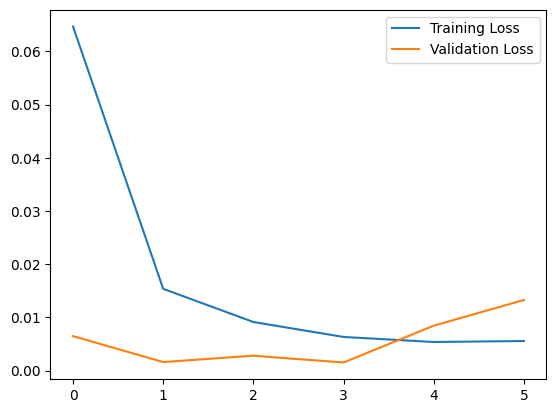

In [111]:
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

# Define early stopping
early_stopping = EarlyStopping(monitor='val_mae', patience=2, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

val_mae = history.history['val_mae'][-1]
print(f'Validation MAE: {val_mae}')


# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Mean Absolute Error (MAE) on the test set: 399.97207480470274


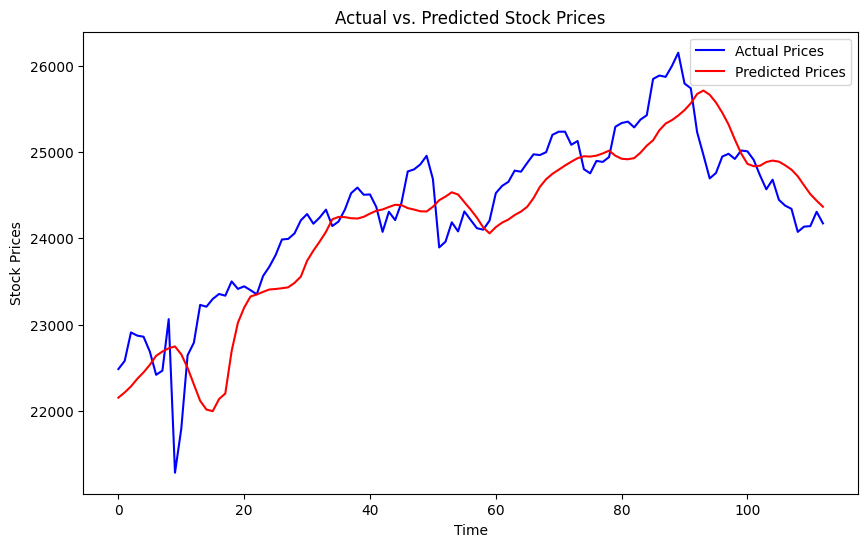

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

# Predict stock prices on the test set
predictions = model.predict(X_test)

# Create a placeholder array with the same shape as the original scaled data
# This is needed because `MinMaxScaler` works on the entire dataset structure
predictions_placeholder = np.zeros((predictions.shape[0], scaled_data.shape[1]))
predictions_placeholder[:, 3] = predictions[:, 0]  # Place predictions in the 'Close' column (index 3)

# Inverse transform the predictions to the original scale
predictions_actual = scaler.inverse_transform(predictions_placeholder)[:, 3]  # Extract the 'Close' column

# Prepare the actual test labels (y_test) for inverse transformation
y_test_placeholder = np.zeros((y_test.shape[0], scaled_data.shape[1]))
y_test_placeholder[:, 3] = y_test  # Place actual test values in the 'Close' column (index 3)

# Inverse transform the actual values
y_test_actual = scaler.inverse_transform(y_test_placeholder)[:, 3]  # Extract the 'Close' column

# Calculate the MAE on the test set
mae = mean_absolute_error(y_test_actual, predictions_actual)
print(f'Mean Absolute Error (MAE) on the test set: {mae}')

# Plot the actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predictions_actual, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()


In [113]:
predictions_actual

array([22151.94077189, 22211.97063944, 22281.79296332, 22369.91085229,
       22445.00880028, 22532.30354223, 22636.64865232, 22686.91973773,
       22724.46347352, 22745.48739684, 22653.87936449, 22497.37217577,
       22305.56095949, 22115.36909791, 22013.67975945, 21995.24201441,
       22135.42395269, 22200.48624182, 22690.38144513, 23020.5240155 ,
       23196.35645141, 23324.49574871, 23348.37898547, 23378.07962674,
       23405.9902974 , 23411.82566148, 23420.44775241, 23431.17709972,
       23482.7180765 , 23554.92977169, 23738.60530211, 23856.72764844,
       23961.74025593, 24074.3430273 , 24219.47357582, 24247.31240819,
       24244.91630203, 24232.17548273, 24228.71527196, 24248.4154252 ,
       24286.0901162 , 24318.74884855, 24334.08108436, 24362.45122072,
       24388.16109555, 24383.77072865, 24349.75305539, 24332.99453029,
       24312.79749557, 24310.5989447 , 24364.73657618, 24441.37755069,
       24482.91354954, 24533.1771518 , 24507.07515966, 24419.13013156,
      

In [114]:
y_test_actual

array([22483.15039062, 22577.44921875, 22908.        , 22871.19921875,
       22858.5       , 22685.44921875, 22417.        , 22465.09960938,
       23062.30078125, 21281.44921875, 21791.94921875, 22642.59960938,
       22789.05078125, 23227.15039062, 23206.65039062, 23295.94921875,
       23353.90039062, 23334.25      , 23499.69921875, 23412.90039062,
       23442.59960938, 23398.19921875, 23350.        , 23562.05078125,
       23670.44921875, 23805.40039062, 23985.80078125, 23992.69921875,
       24056.40039062, 24207.09960938, 24281.        , 24168.84960938,
       24240.55078125, 24331.90039062, 24141.80078125, 24193.75      ,
       24331.15039062, 24522.75      , 24587.65039062, 24504.44921875,
       24508.15039062, 24362.30078125, 24074.19921875, 24307.25      ,
       24210.80078125, 24410.90039062, 24774.59960938, 24798.65039062,
       24856.5       , 24956.40039062, 24686.84960938, 23893.69921875,
       23960.40039062, 24184.90039062, 24079.69921875, 24311.19921875,
      